In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [4]:
data_dir = '/content/drive/MyDrive/Defense/Augmented Data'
target_size = (224, 224)
batch_size = 128

train = train_datagen.flow_from_directory(
    f'{data_dir}/Train',
    target_size=(224, 224),
    batch_size= 32,
    class_mode='categorical'
)

validation = validation_datagen.flow_from_directory(
    f'{data_dir}/Validation',
    target_size=(224, 224),
    batch_size= 32,
    class_mode='categorical'
)

test = validation_datagen.flow_from_directory(
    f'{data_dir}/Test',
    target_size=(224, 224),
    batch_size= 32,
    shuffle=False,
    class_mode='categorical'
)

Found 2400 images belonging to 4 classes.
Found 300 images belonging to 4 classes.
Found 300 images belonging to 4 classes.


In [5]:
input_shape = (224, 224, 3)


model = models.Sequential([

    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax'),
])

model.build(input_shape=input_shape)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
history = model.fit(
    x=train,
    validation_data=validation,
    verbose=1,
    epochs=30,
)

Epoch 1/30
75/75 [==============================] - 1517s 20s/step - loss: 1.1511 - accuracy: 0.3988 - val_loss: 1.0757 - val_accuracy: 0.4533
Epoch 2/30
75/75 [==============================] - 277s 4s/step - loss: 0.9397 - accuracy: 0.5608 - val_loss: 0.5866 - val_accuracy: 0.8167
Epoch 3/30
75/75 [==============================] - 275s 4s/step - loss: 0.6510 - accuracy: 0.7225 - val_loss: 0.5180 - val_accuracy: 0.7733
Epoch 4/30
75/75 [==============================] - 268s 4s/step - loss: 0.5107 - accuracy: 0.7837 - val_loss: 0.4953 - val_accuracy: 0.7933
Epoch 5/30
75/75 [==============================] - 268s 4s/step - loss: 0.3927 - accuracy: 0.8400 - val_loss: 0.3158 - val_accuracy: 0.8900
Epoch 6/30
75/75 [==============================] - 268s 4s/step - loss: 0.4160 - accuracy: 0.8317 - val_loss: 0.5109 - val_accuracy: 0.8200
Epoch 7/30
75/75 [==============================] - 261s 3s/step - loss: 0.2962 - accuracy: 0.8838 - val_loss: 0.4031 - val_accuracy: 0.8533
Epoch 8/30


In [23]:
loss, accuracy = model.evaluate(test)

10/10 [==============================] - 11s 1s/step - loss: 0.1547 - accuracy: 0.9433


In [24]:
print("Accuracy:", accuracy)
print("Loss:", loss)

Accuracy: 0.9433333277702332
Loss: 0.15472479164600372


In [16]:
class_indices = test.class_indices

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

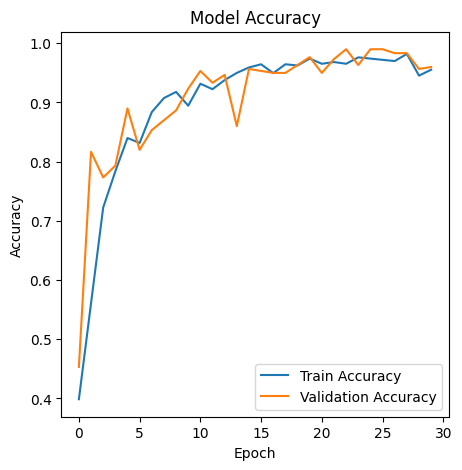

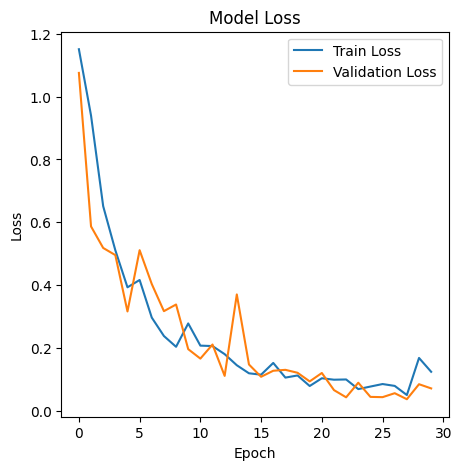

In [20]:
plt.figure(figsize=(5, 5))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()

plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [17]:
from sklearn import metrics
import numpy as np

predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test.classes
class_labels = list(class_indices.keys())
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

10/10 [==============================] - 8s 757ms/step
               precision    recall  f1-score   support

 Angular Spot       0.95      0.97      0.96        75
 Healthy Leaf       0.97      0.93      0.95        75
    Leaf Curl       0.90      0.97      0.94        75
Yellow Mosaic       0.96      0.89      0.92        75

     accuracy                           0.94       300
    macro avg       0.94      0.94      0.94       300
 weighted avg       0.94      0.94      0.94       300



<Axes: >

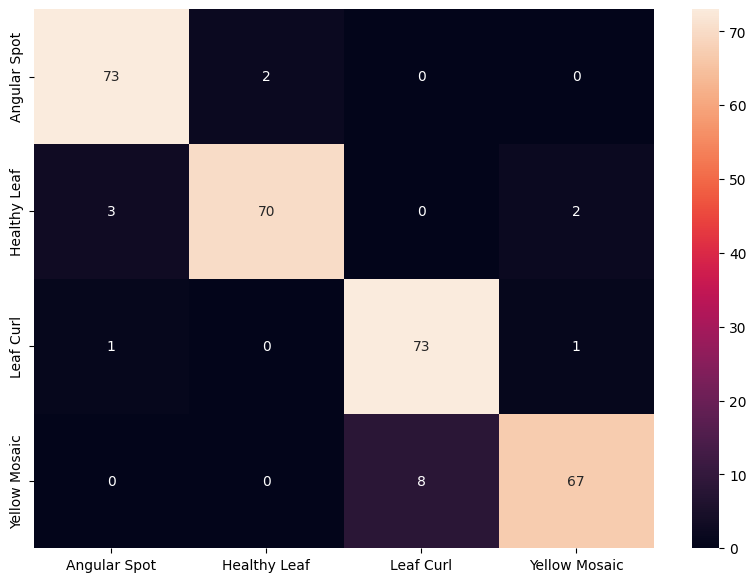

In [18]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in ['Angular Spot', 'Healthy Leaf', 'Leaf Curl', 'Yellow Mosaic']],
                  columns = [i for i in ['Angular Spot', 'Healthy Leaf', 'Leaf Curl', 'Yellow Mosaic']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')